# Bank Marketing
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

**The classification goal is to predict if the client will subscribe a term deposit (variable y).**

A term deposit is a **fixed-term investment** that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

**NOTE**
1.   This notebook aims at data analysis and model construction in general, the variables of the context in which the data were collected will NOT be used. Ex: Euribor (average interest rate on eurozone unsecured interbank loans), consumer price index, consumer confidence index, etc.

2.   The 'bank-full' dataset has more data than the 'bank-additional-full'.

Available on UCI Dataset Repository
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Imports

In [57]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
db = pd.read_csv('/content/drive/MyDrive/01 - Data Science/Portifólio Data Science/bank_marketing/bank-full.csv', sep=';')

## EDA

In [59]:
#overview

db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
#checking variables type

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
#Checking null values
db.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Considering the character of fixed investment time, it is worth a detailed investigation of the variables in relation to age

In [62]:
#Checking age dispersion

plt.figure(figsize=[20, 8])
px.histogram(db, x='age')

<Figure size 1440x576 with 0 Axes>

In [63]:
#Count customers age > 60

db[db['age'] > 60].count()['age']

1188

In [64]:
#Age > 69 in %
a = db[db['age'] > 60].count()['age']
b = db.count()['age']

print('The % of customers with age > 60 is', round((a/b)*100, 2))

The % of customers with age > 60 is 2.63


In [65]:
#Age < 60 in %
c = db[db['age'] < 60].count()['age']
b = db.count()['age']

print('The % of customers with age < 60 is', round((c/b)*100, 2))

The % of customers with age < 60 is 96.05


In [66]:
#Checking age dispersion

plt.figure(figsize=[20, 8])
px.histogram(db[db['age'] > 60], x='age', color='marital')

<Figure size 1440x576 with 0 Axes>

In [67]:
#Checking personal loan per age

plt.figure(figsize=[20, 8])
px.histogram(db[db['age'] > 60], x='age', color='loan')

<Figure size 1440x576 with 0 Axes>

In [68]:
#Checking housing loan per age

plt.figure(figsize=[20, 8])
px.histogram(db[db['age'] > 60], x='age', color='housing')

<Figure size 1440x576 with 0 Axes>

In [69]:
# Checking Total of Jobs

plt.figure(figsize=[20, 8])
px.histogram(db, x='job')

<Figure size 1440x576 with 0 Axes>

In [70]:
# Checking marital status

plt.figure(figsize=[20, 8])
px.histogram(db, x='marital')

<Figure size 1440x576 with 0 Axes>

In [71]:
# Checking Education

plt.figure(figsize=[20, 8])
px.pie(db, names='education')

<Figure size 1440x576 with 0 Axes>

In [72]:
# has credit in default?

plt.figure(figsize=[20, 8])
px.histogram(db, x='default')

<Figure size 1440x576 with 0 Axes>

In [73]:
#has personal loan?

plt.figure(figsize=[20, 8])
px.histogram(db, x='loan')

<Figure size 1440x576 with 0 Axes>

In [74]:
db['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [75]:
# converting month to date
# creating dict to map
#month_to_class = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

#replacing
#db['month_n'] = db['month'].map(month_to_class)

In [76]:
# last contact month of year

plt.figure(figsize=[20, 8])
px.histogram(db, x='month')

<Figure size 1440x576 with 0 Axes>

In [77]:
db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


[According to the Portuguese Securities Market Commission (CMVM)](https://www.cmvm.pt/pt/EstatisticasEstudosEPublicacoes/Estudos/Pages/O%20Perfil%20do%20Investidor%20Particular%20Portugu%C3%AAs.aspx?v=#:~:text=Em%20termos%20de%20idade%20(Painel,de%20idades%20e%20aquela%20percentagem.) (headquarters of the Bank), only approximately 7% of the population, over 65 years of age, invest in time deposit financial products and similar products. This will be our cut-off age of outliers for model creation.

In [78]:
dbm = db[db['age'] < 66]

In [79]:
# Categoric count of unique values
dbm[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [80]:
dbm.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [81]:
dbm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
dbm['y'].value_counts()

no     39491
yes     4969
Name: y, dtype: int64

In [83]:
# Converting target to numeric
yconverter = {'no': 0, 'yes': 1}

# replacing
dbm['y'] = dbm['y'].map(yconverter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
dbmf = pd.get_dummies(dbm)

In [85]:
dbmf.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [86]:
# escalonar as features numéricas: idade e balance

## Model

In [87]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, r2_score

In [89]:
x = dbmf.drop('y', axis=1)
y = dbmf['y']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



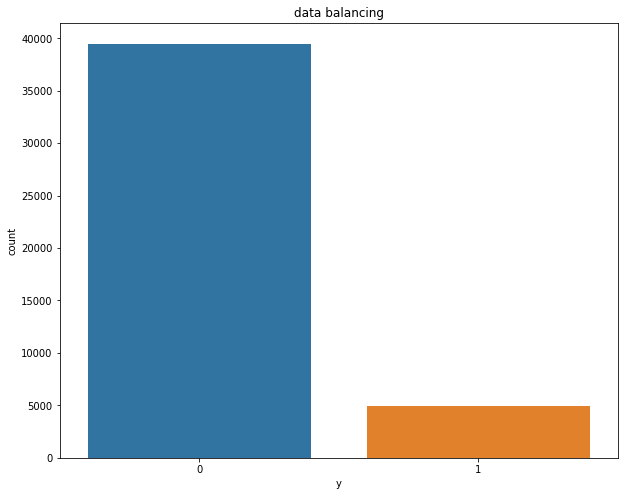

0    39491
1     4969
Name: y, dtype: int64

In [91]:
# target variable balancing

plt.subplots(figsize=(10,8))

sns.countplot(dbmf['y'])
plt.title('data balancing')
plt.show()

#Contagem
dbmf['y'].value_counts()

#0 if costumer subscribed a term deposit, 1 if not subscribed

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



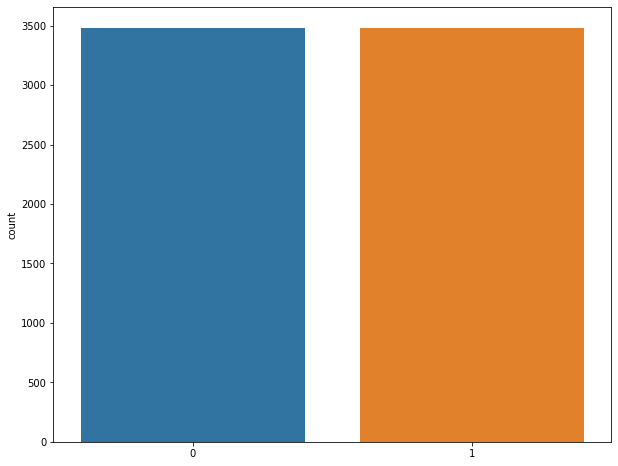

In [92]:
#balancing dataset for fitting

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_rus, y_rus = rus.fit_sample(x_train, y_train)

plt.figure(figsize=[10, 8])
sns.countplot(y_rus)

In [93]:
# training the models

rfc = RandomForestClassifier(random_state=1, n_estimators=1000)
lr = LogisticRegression(random_state=1)
xgbc = XGBClassifier(random_state=1, scale_pos_weight=8) #scale pos weight = 39491/4969 = 8

rfc.fit(x_rus, y_rus)
lr.fit(x_rus, y_rus)
xgbc.fit(x_train.values, y_train.values)

rfc_pred = rfc.predict(x_test) #Random Forest Classifier
lr_pred = lr.predict(x_test) #Logistic Regression
xgbc_pred = xgbc.predict(x_test.values) #XGBoost Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



##Valuation

In [94]:
# creating baseline
baseline_preds = np.random.choice([0,1], size = len(y_test))

baseline_preds

array([0, 1, 1, ..., 0, 1, 0])

Baseline report: 
               precision    recall  f1-score   support

           0       0.88      0.50      0.64     11853
           1       0.11      0.48      0.18      1485

    accuracy                           0.50     13338
   macro avg       0.50      0.49      0.41     13338
weighted avg       0.80      0.50      0.58     13338



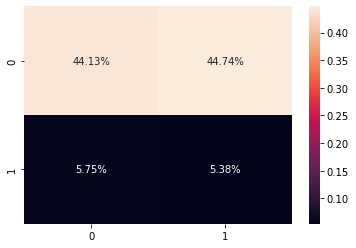

In [95]:
rep = classification_report(y_test, baseline_preds)
print(f'Baseline report: \n {rep}')

baseline_matrix = confusion_matrix(y_test, baseline_preds)
sns.heatmap(baseline_matrix/np.sum(baseline_matrix), annot=True, fmt='.2%')

Random Forest Classifier report: 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     11853
           1       0.40      0.91      0.55      1485

    accuracy                           0.84     13338
   macro avg       0.69      0.87      0.73     13338
weighted avg       0.92      0.84      0.86     13338



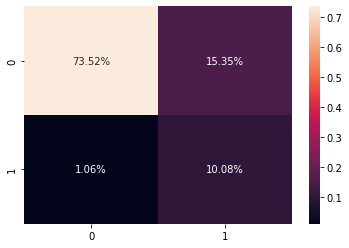

In [96]:
rep = classification_report(y_test, rfc_pred)
print(f'Random Forest Classifier report: \n {rep}')

rfc_matrix = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_matrix/np.sum(rfc_matrix), annot=True, fmt='.2%')

Logistic Regression report: 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89     11853
           1       0.35      0.79      0.49      1485

    accuracy                           0.82     13338
   macro avg       0.66      0.81      0.69     13338
weighted avg       0.90      0.82      0.84     13338



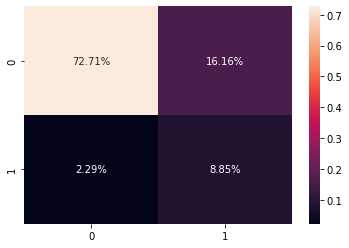

In [97]:
rep = classification_report(y_test, lr_pred)
print(f'Logistic Regression report: \n {rep}')

lr_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_matrix/np.sum(lr_matrix), annot=True, fmt='.2%')

XGBoost Classifier report: 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     11853
           1       0.40      0.88      0.55      1485

    accuracy                           0.84     13338
   macro avg       0.69      0.86      0.73     13338
weighted avg       0.92      0.84      0.86     13338



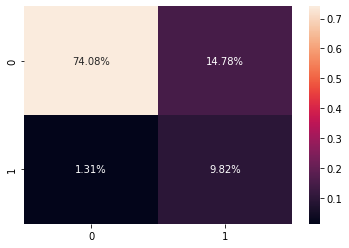

In [98]:
rep = classification_report(y_test, xgbc_pred)
print(f'XGBoost Classifier report: \n {rep}')

xgbc_matrix = confusion_matrix(y_test, xgbc_pred)
sns.heatmap(xgbc_matrix/np.sum(xgbc_matrix), annot=True, fmt='.2%')

## Comparing Models

In [108]:
print('XGBoost Classifier Recall: ', recall_score(y_test, xgbc_pred))
print('Random Forest Recall: ', recall_score(y_test, rfc_pred))
print('Logistic Regression Recall: ', recall_score(y_test, lr_pred))
print('Baseline Recall: ', recall_score(y_test, baseline_preds))

print('\n')

print('XGBoost Classifier Precision: ', precision_score(y_test, xgbc_pred))
print('Random Forest Precision: ', precision_score(y_test, rfc_pred))
print('Logistic Regression Precision: ', precision_score(y_test, lr_pred))
print('Baseline Precision: ', precision_score(y_test, baseline_preds))

print('\n')

print('XGBoost Classifier Accuracy: ', accuracy_score(y_test, xgbc_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rfc_pred))
print('Logistic Regression Accuracy: ', accuracy_score(y_test, lr_pred))
print('Baseline Accuracy: ', accuracy_score(y_test, baseline_preds))

XGBoost Classifier Recall:  0.8821548821548821
Random Forest Recall:  0.9050505050505051
Logistic Regression Recall:  0.7946127946127947
Baseline Recall:  0.4835016835016835


XGBoost Classifier Precision:  0.3991468616697136
Random Forest Precision:  0.3963432615747567
Logistic Regression Precision:  0.3538230884557721
Baseline Precision:  0.10740463724756918


XGBoost Classifier Accuracy:  0.8390313390313391
Random Forest Accuracy:  0.8359574149047834
Logistic Regression Accuracy:  0.8155645524066577
Baseline Accuracy:  0.4951267056530214
